In [1]:
import numpy as np
# import matplotlib.pyplot as plt
# import scipy.stats as stats
# import scipy
from tqdm.notebook import tqdm, trange
# import climlab
# import xarray as xr
# from metpy.plots import SkewT
# from numpy import deg2r²ad
# from math import *
from fastkde import fastKDE
import multiprocessing as mp
import socket
import json
import os

from src.models import *
from src.utils import *
from src.npFDT import *

# password = getpass("Enter your email password:")
password = ''

## Init Simu any dim 

Equilibrium values: [2.76313532 2.50817813 1.80756892 1.91794032 2.34659463]


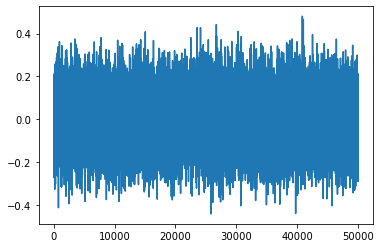

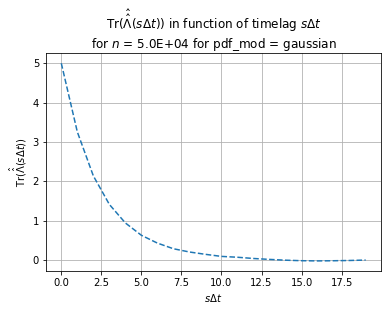

In [6]:
#dimension of the system
d=5
models = get_models_lm(d_max=d)
# with open('linear_models.json') as json_file:
#     models = json.load(json_file)


#INITIALIZATION
#simu parameters
n=int(5e4)
subsample=True
m=n
K=5
h=1.
t0=0
tf=n/100
dt=0.01

#model parameters
eps=1.
T=20/eps 

B=np.array(models[f'{d}D'][0])
noise = 0.1
x0= np.ones(d) #init_cond_LM(B, noise)
model_params = {'B':B,'noise':noise}
f_null = lambda t : 0
pert = np.array(models[f'{d}D'][1])
f = lambda t : pert*eps
params = {'model_params':model_params, 'f':f, 'dim':B.shape[0]}

eq_values = get_equilibrium_lm(B=B, f=f, nb_samples=1e4)
print('Equilibrium values:', eq_values)

# # One trajectory
dt=1
x = fast_one_trajectory_LM(model_params, delta_t=dt, n=int(n+T))
plt.plot(x[:,0])
plt.show()


term_pdf = term_pdf_gaussian(x=x,m=m)

int_val = np.arange(0,T, dt) #integration values
s_val = np.arange(0,len(int_val)).astype(int) #values at which evaluate lambda_hat(s) 
# function to integrate
with mp.Pool(mp.cpu_count()) as pool:
    funct_val = np.array(pool.map(partial(lambda_hat,m=m,x=x,term_pdf=term_pdf),s_val))
funct_val = funct_val@ np.linalg.inv(lambda_hat(s=0,m=m,x=x,term_pdf=term_pdf))


funct = np.trace(np.moveaxis(funct_val,0,2)) #np.sum(funct_val,axis=(1,2))
plt.figure()
plt.plot(int_val, funct, '--')
plt.title(r'$\mathrm{Tr}(\hat{\hat{\Lambda}}(s \Delta t))$ in function of timelag $s \Delta t$' +'\n' r'for $n$ = %.1E' % n + ' for pdf_mod = gaussian')
plt.xlabel(r'$s \Delta t$')
plt.ylabel(r'$\mathrm{Tr}(\hat{\hat{\Lambda}}(s \Delta t))$')
plt.grid()
plt.show()
dt=0.01

In [8]:
K=5
mean, res = simulation(linear_model, params, K, n, m, x0, dt, T=T, subsample=True, pre_comp=None, par_mod='bottom', pdf_mod='subcooper1000', h=h, 
            password=password, verbose=False, no_mail=True)
print("Mean : ", mean)
mean_error = np.mean(np.abs(mean-eq_values)/eq_values)
print("Mean error : ", mean_error)
mean_std = np.mean(np.std(res, axis=0) / eq_values)
print("Mean std", mean_std)

---------------------------------------------------------------------------
Launching simulations with K=5 iterations, n=5.00E+04 samples...


  0%|          | 0/5 [00:00<?, ?it/s]

PDF ESTIMATED at iter 0... begining of the L_hat estimation after 20.723414 seconds
Result iter 0: [2.89465073 2.77484751 1.37768487 1.94790821 2.03943379]
Computation time after pdf: 1.05585 seconds
PDF ESTIMATED at iter 1... begining of the L_hat estimation after 20.131886 seconds
Result iter 1: [2.92204727 2.73567594 1.83328414 2.01710971 2.05949325]
Computation time after pdf: 1.126129 seconds
PDF ESTIMATED at iter 2... begining of the L_hat estimation after 19.642679 seconds
Result iter 2: [2.9838876  2.60326459 1.8016172  1.7616974  2.26552245]
Computation time after pdf: 1.0513 seconds
PDF ESTIMATED at iter 3... begining of the L_hat estimation after 19.809097 seconds
Result iter 3: [2.8571778  2.53790604 1.69830746 2.11169234 2.72497924]
Computation time after pdf: 1.067236 seconds
PDF ESTIMATED at iter 4... begining of the L_hat estimation after 20.226061 seconds
Result iter 4: [2.94011504 2.88332232 1.56749297 2.27526508 2.22519554]
Computation time after pdf: 1.026297 second